In [1]:
!pip install texthero
!pip install textfeatures

In [2]:
import pandas as pd
import texthero as hero
from texthero import preprocessing
import textfeatures as tf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#create a custom cleaning pipeline
custom_pipeline = [preprocessing.fillna,
                    preprocessing.lowercase,
                    preprocessing.remove_digits,
                    preprocessing.remove_punctuation,
                    preprocessing.remove_diacritics,
                    preprocessing.remove_stopwords,
                    preprocessing.remove_whitespace]

In [4]:
df = pd.read_csv('abstracts.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3000 non-null   int64 
 1   Title       3000 non-null   object
 2   Abstract    3000 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.4+ KB


In [6]:
df = df.rename(columns={'Unnamed: 0': 'Id'})
df.set_index('Id')

,Title,Abstract
Id,,
0,Interrogating the function of GABA<sub>A</sub>...,To better understand neural circuits and behav...
1,Floralozone improves cognitive impairment in v...,Vascular dementia (VD) is the second largest t...
2,"The effects of Vilazodone, YL-0919 and Vortiox...",Parkinson's disease is a neurodegenerative dis...
3,Deciphering therapeutic options for neurodegen...,Silent information regulator 1 (SIRT1) is a ni...
4,Therapeutic effect of extracellular vesicles f...,Extracellular vesicles (EVs) are biologically ...
...,...,...
2995,Challenges and opportunities in translational ...,"For decades, basic research on the underlying ..."
2996,Growth and Differentiation of Circulating Stem...,Stem cell therapy is gaining momentum as an ef...
2997,Remote Ischemic Postconditioning vs. Physical ...,There remain debates on neuroprotection and re...


# Cleaning abstracts

In [7]:
df['clean_abstracts'] = hero.clean(df['Abstract'], pipeline = custom_pipeline)
df

,Id,Title,Abstract,clean_abstracts
0,0,Interrogating the function of GABA<sub>A</sub>...,To better understand neural circuits and behav...,better understand neural circuits behavior mic...
1,1,Floralozone improves cognitive impairment in v...,Vascular dementia (VD) is the second largest t...,vascular dementia vd second largest type demen...
2,2,"The effects of Vilazodone, YL-0919 and Vortiox...",Parkinson's disease is a neurodegenerative dis...,parkinson disease neurodegenerative disease of...
3,3,Deciphering therapeutic options for neurodegen...,Silent information regulator 1 (SIRT1) is a ni...,silent information regulator sirt1 nicotinamid...
4,4,Therapeutic effect of extracellular vesicles f...,Extracellular vesicles (EVs) are biologically ...,extracellular vesicles evs biologically active...
...,...,...,...,...
2995,2995,Challenges and opportunities in translational ...,"For decades, basic research on the underlying ...",decades basic research underlying mechanisms n...
2996,2996,Growth and Differentiation of Circulating Stem...,Stem cell therapy is gaining momentum as an ef...,stem cell therapy gaining momentum effective t...
2997,2997,Remote Ischemic Postconditioning vs. Physical ...,There remain debates on neuroprotection and re...,remain debates neuroprotection rehabilitation ...
2998,2998,Working Memory for Signs with Poor Visual Reso...,Stimulus degradation adds to working memory lo...,stimulus degradation adds working memory load ...


In [8]:
# Getting word count using text features
tf.word_count(df,"clean_abstracts","word_cnt")
df[["clean_abstracts","word_cnt"]].head(10)

,clean_abstracts,word_cnt
0,better understand neural circuits behavior mic...,133
1,vascular dementia vd second largest type demen...,190
2,parkinson disease neurodegenerative disease of...,215
3,silent information regulator sirt1 nicotinamid...,102
4,extracellular vesicles evs biologically active...,79
5,tauopathies group neurodegenerative diseases a...,91
6,management chronic neuropathic pain remains ch...,97
7,neuromuscular training nmt facilitates acquisi...,18
8,post traumatic stress disorder ptsd emerged se...,23
9,substantial evidence indicates bisphenol bpa u...,141


In [9]:
# Data preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = df['clean_abstracts'].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

In [10]:
feature_names = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# K-Means

1) Deciding the number of clusters

In [11]:
kmeans_kwargs = {  
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
   
# A list holds the SSE values for each k
sse = []  # sum of squared error (distances in our case)
for k in range(1, 21):  # we will try clustering data into range(1, 11) clusters
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)  # initiates the k-means algorithm
  kmeans.fit(features)  # fits k-means on our data
  sse.append(kmeans.inertia_)  # Sum of squared distances of samples to their closest cluster center.kl.plot_knee()

In [12]:
 import matplotlib.pyplot as plt

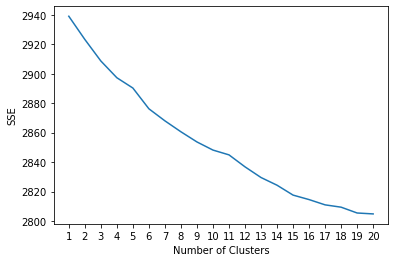

In [13]:
fig, axs = plt.subplots()
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

fig.set(facecolor='white')
plt.show()

In [14]:
pip install kneed

In [15]:
from kneed import KneeLocator
import matplotlib.pyplot as plt  # plotting

kl = KneeLocator(
    range(1, 21), sse, curve="convex", direction="decreasing"
    )

print(f'We should use {kl.elbow} clusters.')

We should use 13 clusters.


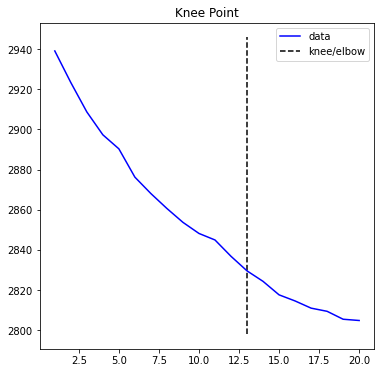

In [16]:
kl.plot_knee()

In [17]:
k = 13
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=13, n_init=1)

In [18]:
df['cluster'] = model.labels_

df.head()

,Id,Title,Abstract,clean_abstracts,word_cnt,cluster
0,0,Interrogating the function of GABA<sub>A</sub>...,To better understand neural circuits and behav...,better understand neural circuits behavior mic...,133,2
1,1,Floralozone improves cognitive impairment in v...,Vascular dementia (VD) is the second largest t...,vascular dementia vd second largest type demen...,190,3
2,2,"The effects of Vilazodone, YL-0919 and Vortiox...",Parkinson's disease is a neurodegenerative dis...,parkinson disease neurodegenerative disease of...,215,2
3,3,Deciphering therapeutic options for neurodegen...,Silent information regulator 1 (SIRT1) is a ni...,silent information regulator sirt1 nicotinamid...,102,1
4,4,Therapeutic effect of extracellular vesicles f...,Extracellular vesicles (EVs) are biologically ...,extracellular vesicles evs biologically active...,79,1


In [19]:
# output the result to a text file.

clusters = df.groupby('cluster')    

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['Id','Abstract']] # get title and overview columns
    f.write(data.to_csv(index_label='Id')) # set index to id
    f.close()

In [20]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 sci
 spinal
 cord
 injury
 motor
 recovery
 cervical
 functional
 stimulation
 respiratory
------------
Cluster 1:
 brain
 neuronal
 disorders
 plasticity
 development
 synaptic
 cell
 disease
 neurons
 cells
------------
Cluster 2:
 sub
 gaba
 receptor
 sup
 rs
 receptors
 synaptic
 ht
 2a
 tonic
------------
Cluster 3:
 mice
 hippocampal
 memory
 hippocampus
 synaptic
 rats
 stress
 expression
 cognitive
 plasticity
------------
Cluster 4:
 sleep
 memory
 rem
 circadian
 nrem
 wake
 sd
 consolidation
 deprivation
 synaptic
------------
Cluster 5:
 sup
 ca
 synaptic
 mice
 plasticity
 neurons
 neuronal
 channels
 sub
 protein
------------
Cluster 6:
 exercise
 physical
 effects
 cognitive
 neuroplasticity
 aerobic
 bdnf
 pd
 training
 intensity
------------
Cluster 7:
 stroke
 motor
 stimulation
 rehabilitation
 tdcs
 recovery
 brain
 transcranial
 rtms
 patients
------------
Cluster 8:
 plasticity
 brain
 learning
 visual
 neural
 activity
 network
 s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Wordcloud

In [21]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
stop_words = set(stopwords.words('english'))

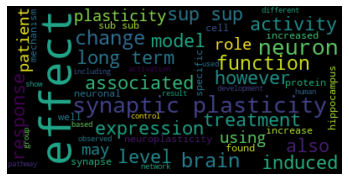

In [23]:
abs = " ".join(abstract for abstract in df.clean_abstracts)
wordcloud2 = WordCloud(stopwords=stop_words, max_words=50).generate(abs)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()